In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
cifar = tf.keras.datasets.cifar10
(xtrain,ytrain),(xtest, ytest) = cifar.load_data()
xtrain, xtest = xtrain/255.0, xtest/255.0
ytrain, ytest = ytrain.flatten(), ytest.flatten()
print("xtrain.shape: ", xtrain.shape)
print("ytrain.shape: ", ytrain.shape)

170498071/170498071 [==============================] - 10s 0us/step
xtrain.shape:  (50000, 32, 32, 3)
ytrain.shape:  (50000,)


In [ ]:
k = len(set(ytrain))
print("number of classes: ", k)

number of classes:  10


In [ ]:
#building the model using functional api:
i = Input(shape=xtrain[0].shape)

x = Conv2D(32,(3,3),activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3),activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3),activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)
model = Model(i,x)

In [ ]:
#compile and fit:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 29s 8ms/step - loss: 1.2930 - accuracy: 0.5533 - val_loss: 0.9357 - val_accuracy: 0.6680
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8317 - accuracy: 0.7103 - val_loss: 0.7857 - val_accuracy: 0.7326
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6724 - accuracy: 0.7698 - val_loss: 0.8747 - val_accuracy: 0.7244
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5667 - accuracy: 0.8059 - val_loss: 0.6431 - val_accuracy: 0.7852
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4784 - accuracy: 0.8351 - val_loss: 0.5843 - val_accuracy: 0.8130
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4010 - accuracy: 0.8621 - val_loss: 0.6114 - val_accuracy: 0.8007
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3426 - accuracy: 0.8830 - val_loss: 0.6002 - val_ac

In [ ]:
batchsize=32
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
traingen = datagen.flow(xtrain,ytrain,batchsize)
spe = xtrain.shape[0]//batchsize
r = model.fit_generator(traingen,validation_data=(xtest,ytest),steps_per_epoch=spe, epochs=50)

Epoch 1/50


<ipython-input-6-e68a37d0640e>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(traingen,validation_data=(xtest,ytest),steps_per_epoch=spe, epochs=50)


1562/1562 [==============================] - 35s 22ms/step - loss: 0.5421 - accuracy: 0.8266 - val_loss: 0.5040 - val_accuracy: 0.8405
Epoch 2/50
1562/1562 [==============================] - 34s 22ms/step - loss: 0.4290 - accuracy: 0.8597 - val_loss: 0.4374 - val_accuracy: 0.8532
Epoch 3/50
1562/1562 [==============================] - 34s 22ms/step - loss: 0.3972 - accuracy: 0.8682 - val_loss: 0.5167 - val_accuracy: 0.8411
Epoch 4/50
1562/1562 [==============================] - 34s 22ms/step - loss: 0.3827 - accuracy: 0.8712 - val_loss: 0.4513 - val_accuracy: 0.8547
Epoch 5/50
1562/1562 [==============================] - 34s 22ms/step - loss: 0.3574 - accuracy: 0.8816 - val_loss: 0.4668 - val_accuracy: 0.8510
Epoch 6/50
1562/1562 [==============================] - 34s 22ms/step - loss: 0.3450 - accuracy: 0.8834 - val_loss: 0.4435 - val_accuracy: 0.8620
Epoch 7/50
1562/1562 [==============================] - 35s 22ms/step - loss: 0.3349 - accuracy: 0.8872 - val_loss: 0.4321 - val_accura

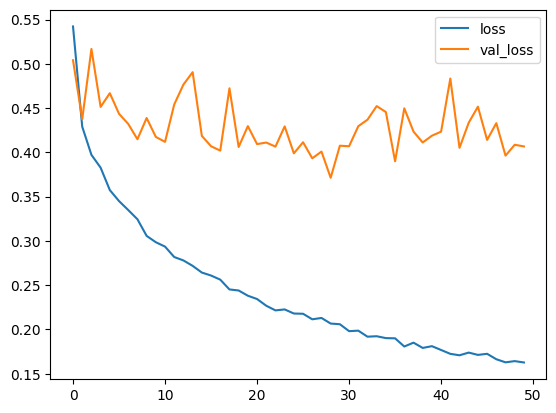

In [ ]:
#plot loss per iteration:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

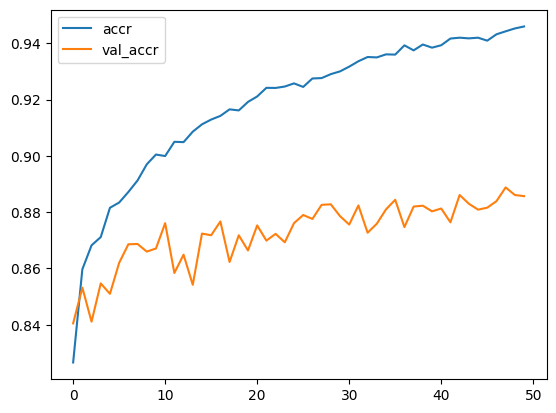

In [ ]:
#accuracy plots per iteration, model is more confident in incorrect predictions:
plt.plot(r.history['accuracy'], label='accr')
plt.plot(r.history['val_accuracy'], label='val_accr')
plt.legend()

313/313 [==============================] - 1s 3ms/step
confusion matrix without normalisation
[[918   6  23   7   1   3   8   5  16  13]
 [  2 957   0   1   1   0   1   0   5  33]
 [ 25   1 819  28  34  35  45   7   3   3]
 [ 17   6  20 748  32  81  63  23   3   7]
 [  6   1  26  16 871  13  43  22   1   1]
 [  2   3  13  83  28 823  23  23   0   2]
 [  4   0  12  12   3   9 955   3   1   1]
 [ 11   1   8  18  28   8   8 914   2   2]
 [ 45  11   4   3   1   2   5   2 907  20]
 [ 15  28   1   5   0   0   1   0   5 945]]


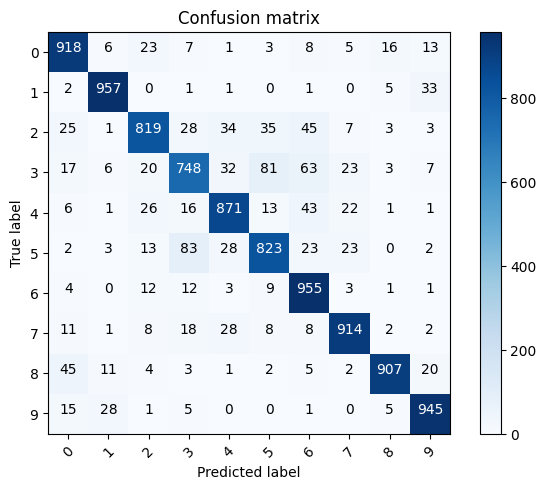

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("normalised confusion matrix")
    else:
        print("confusion matrix without normalisation")
    print(cm)
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tickmarks = np.arange(len(classes))
    plt.xticks(tickmarks,classes,rotation=45)
    plt.yticks(tickmarks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

ptest = model.predict(xtest).argmax(axis=1)
cm = confusion_matrix(ytest,ptest)
plot_confusion_matrix(cm,list(range(10)))

In [ ]:
labels='''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

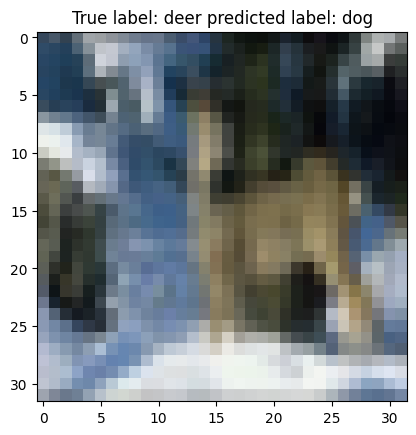

In [ ]:
#misclassified examples:
miss = np.where(ptest!=ytest)[0]
i = np.random.choice(miss)
plt.imshow(xtest[i],cmap='gray')
plt.title("True label: %s predicted label: %s" % (labels[ytest[i]], labels[ptest[i]]));

In [ ]:
#useful information can be yielded using this statement in keras api:
# we can see information on layers and parameters.
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     